In [10]:
#dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import scipy.stats as stats




In [11]:
#importing the kaggle data
kaggle_spot_df = pd.read_csv("Resources/kaggle_spotify.csv")

print(f'The are {len(kaggle_spot_df)} songs in this this data set')
kaggle_spot_df.head()

The are 169909 songs in this this data set


,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


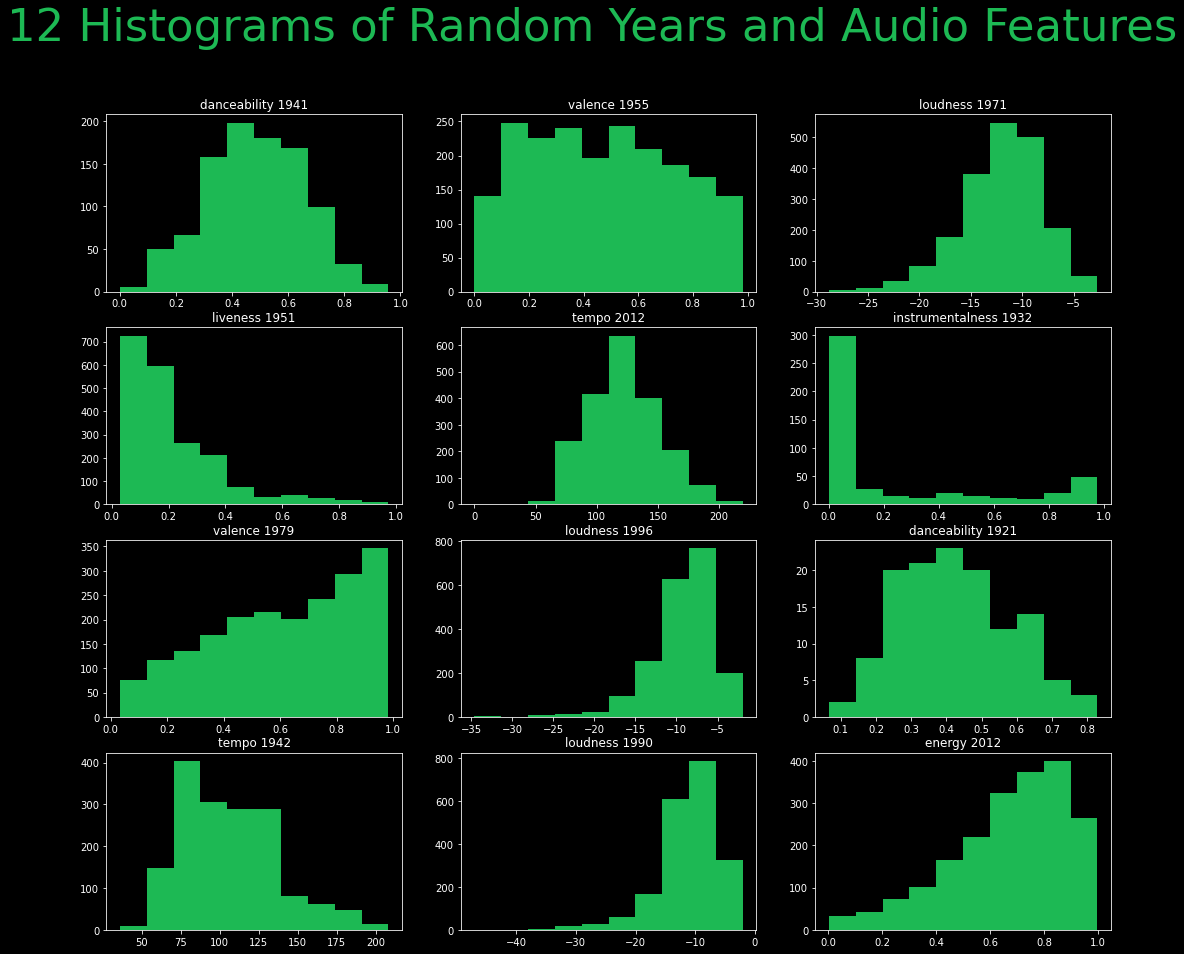

In [12]:
#review histograms of random year for 12 random spotify metrics. 

#creates a list of each year
years_list=kaggle_spot_df['year'].unique().tolist()

#list of each metric
metric_list=['acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']

##### creates 12 histograms for random years and audio features
fig_h=plt.figure(figsize=(18,15),facecolor='black')
fig_h.suptitle('12 Histograms of Random Years and Audio Features',color='#1DB954',fontsize=45)

for t in range(1,13):

    rando_year=random.choice(years_list)
    rando_metric=random.choice(metric_list)
    ax_h=fig_h.add_subplot(4,3,t)
    ax_h.spines['bottom'].set_color('white')
    ax_h.spines['top'].set_color('white')
    ax_h.spines['right'].set_color('white')
    ax_h.spines['left'].set_color('white')
    ax_h.tick_params(axis='x', colors='white')
    ax_h.tick_params(axis='y', colors='white')
    ax_h.yaxis.label.set_color('white')
    ax_h.xaxis.label.set_color('white')
    ax_h.title.set_color('white')
    ax_h.patch.set_alpha(0)
    plt.title(str(rando_metric)+' '+str(rando_year))
    histy=kaggle_spot_df.loc[kaggle_spot_df['year']==rando_year,:][rando_metric]
    plt.hist(histy,color='#1DB954')
plt.show()
 


In [13]:
##### us scipy to check for normal distribution
### this isn't finished
#### ok so im trying to create 2 lists, 1 for the audio featurees we'll graph meean, and another list for median. 

mean_graph_metric_list=[]

median_graph_metric_list=[]
alpha = 1e-3
# alpha= 0.05


# loop through a list of each audio feature(or metric)
for metric in metric_list:


    #create a blank list for the p values for a single audio feature, we'll find the average of these and if it's under a limit(alpha?) we'll use median
    p_values_list=[]
    #this will be a list of years we sampled for each audio feature(metric)
    random_years_list=[]

    #we're gonna take this number of samples for each feature
    for a in range(5):
        #make a random year
        rando_year=random.choice(years_list)
        
        
        #run the normal test on 
        k2, p =stats.normaltest(kaggle_spot_df.loc[kaggle_spot_df['year']==rando_year,:][metric])
        p_values_list.append(p)
        random_years_list.append(rando_year)


        ### just a test block of code to print out the results of each test
        # if p < alpha :
        #     print(f'the p value for the {metric.upper()} in {rando_year} is {p}')
        #     print("this is not normally distributed")
        # else:
        #     print(f'the p value for the {metric.upper()}  in {rando_year}  is {p}')
        #     print("this is normally distributed")


    #this is just printing out the list of year and pvalues we'll need to find the average of to determine if the audio feature should go in the mean_graph_metri_list or the median_graph_metric_list
    print(f'{metric}{random_years_list}')
    print(f'{metric}{p_values_list}')







acousticness[2016, 1946, 1928, 1952, 2004]
acousticness[5.1316879118383696e-54, 1.7980790274650965e-250, 3.629252844854326e-244, 1.6811253527605257e-185, 1.1133636820044344e-54]
danceability[1932, 2004, 2002, 1956, 1985]
danceability[0.00011227260443544676, 1.415174518212878e-08, 6.3756396867640676e-09, 3.5301700889912766e-07, 2.073985258728567e-17]
energy[1986, 1979, 2011, 1991, 1952]
energy[7.345704189521263e-46, 1.932899658126843e-31, 3.943211097916962e-45, 3.006466070134596e-60, 2.5515881479399524e-77]
instrumentalness[1996, 1996, 1997, 1963, 1953]
instrumentalness[9.299796522499458e-243, 9.299796522499458e-243, 4.7192205432071154e-194, 1.3896849621104155e-85, 0.0]
liveness[1955, 1933, 1985, 1979, 1965]
liveness[6.6069511394130196e-170, 1.3432517622312074e-49, 8.21488192303233e-207, 1.1210233879277585e-165, 3.1301322738851405e-183]
loudness[1961, 1985, 1956, 2007, 1992]
loudness[3.280746508453885e-82, 4.623311997390502e-62, 1.3788489741058767e-69, 0.0, 8.474311446946958e-134]
popul

In [14]:

# #agg median of spotify metrics by year
# annual_metrics_df=kaggle_spot_df[['year','acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']].groupby('year').median()



median_annual_metrics_df=kaggle_spot_df[['year','acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']].groupby('year').median()



# mean_annual_metrics_df=kaggle_spot_df[['year','acousticness','danceability','energy','instrumentalness','liveness','loudness', 'popularity','speechiness','tempo','valence']].groupby('year').mean()


# annual_metrics_df.head()



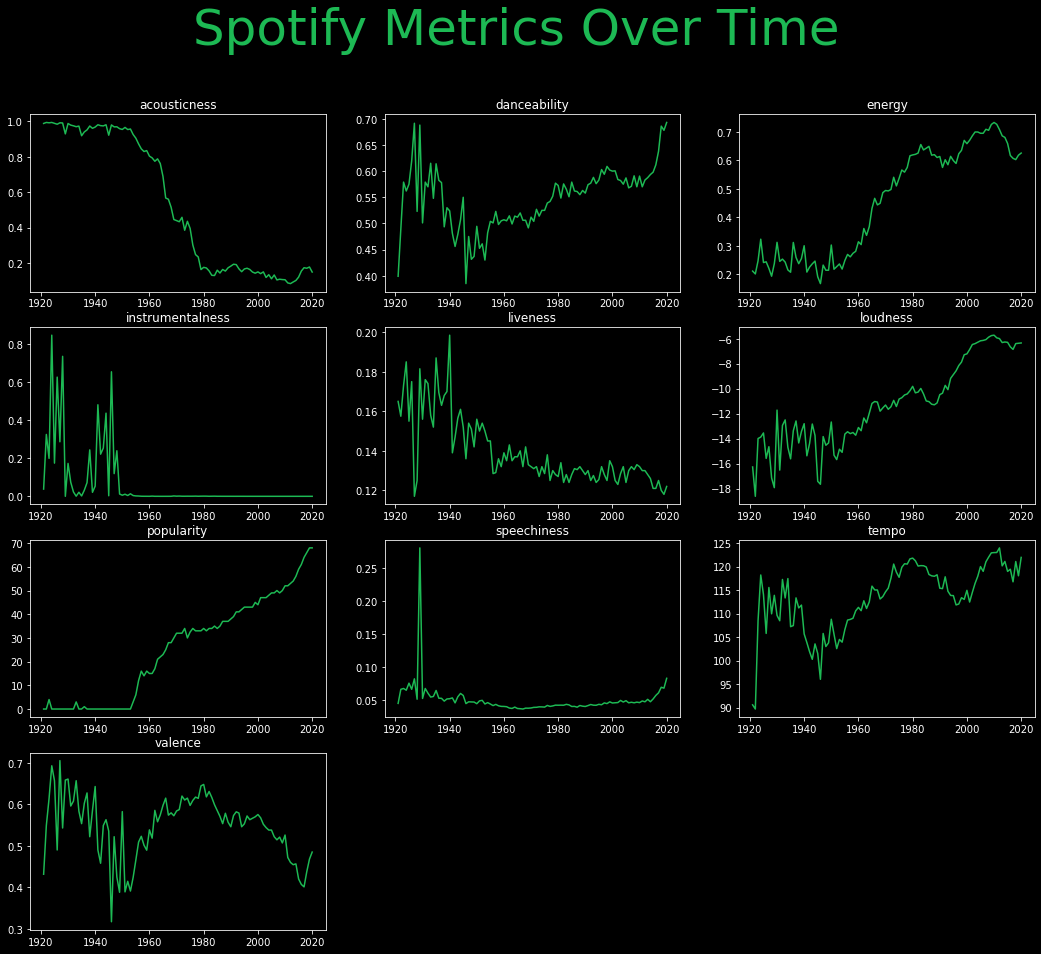

In [15]:



def over_time_graphy(df):
    #turns the metric names into a list
    spot_metric_names=df.columns.to_list()
    ### plots graphs 4 by 3 with spotify colors
    fig = plt.figure(figsize=(18,15),facecolor='black')
    # fig.
    fig.suptitle('Spotify Metrics Over Time',fontsize=50,color='#1DB954')
    for i in range(1,11):
        ax=fig.add_subplot(4,3,i)
        ax.spines['bottom'].set_color('white')
        ax.spines['top'].set_color('white')
        ax.spines['right'].set_color('white')
        ax.spines['left'].set_color('white')
        ax.tick_params(axis='x', colors='white')
        ax.tick_params(axis='y', colors='white')
        ax.yaxis.label.set_color('white')
        ax.xaxis.label.set_color('white')
        ax.title.set_color('white')
        ax.patch.set_alpha(0)
        plt.plot(df.index,df.iloc[:,i-1],c='#1DB954')
        plt.title(spot_metric_names[i-1])
    return plt.show()


over_time_graphy(median_annual_metrics_df)

